# 그리드 서치 (Grid Search)

Best parameters: {'max_depth': None, 'n_estimators': 10}


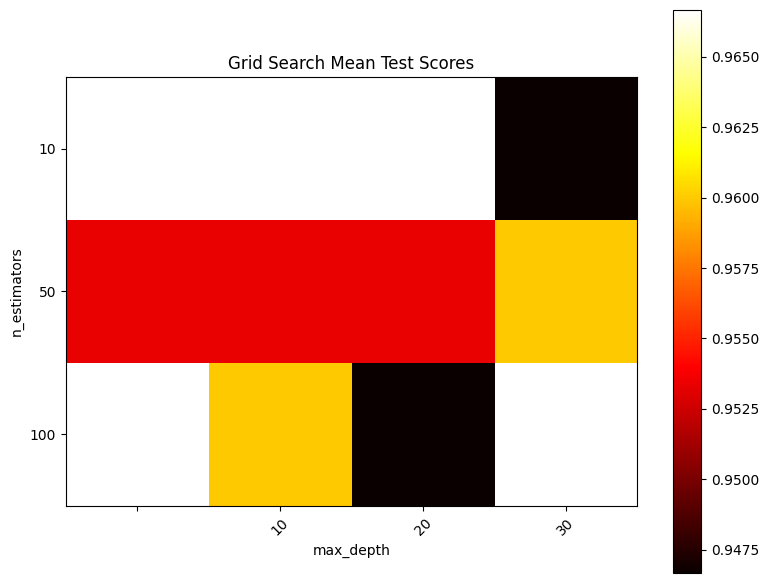

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 모델 및 하이퍼파라미터 범위 정의
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30]
}

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 그리드 서치 결과를 DataFrame으로 변환
results = grid_search.cv_results_

# 시각화
# n_estimators와 max_depth에 따른 평균 점수 시각화
scores_matrix = results['mean_test_score'].reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))

plt.figure(figsize=(8, 6))
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()

# 축 레이블 설정
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'], rotation=45)
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])

plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.title('Grid Search Mean Test Scores')
plt.tight_layout()
plt.show()


# 랜덤 서치 (Random Search)

Best parameters: {'n_estimators': 180, 'max_depth': None}
Mean Test Scores: [0.96       0.96666667 0.95333333 0.96666667 0.96       0.96
 0.96666667 0.96666667 0.96666667 0.96       0.95333333 0.96
 0.96       0.96666667 0.96666667 0.96666667 0.96666667 0.96
 0.96666667 0.96666667 0.96       0.96666667 0.96666667 0.96
 0.96666667 0.94666667 0.96666667 0.95333333 0.96       0.96666667
 0.96       0.96       0.94666667 0.96       0.96       0.96
 0.96       0.95333333 0.96666667 0.95333333 0.95333333 0.96666667
 0.95333333 0.96       0.96666667 0.96666667 0.96666667 0.96666667
 0.96       0.96      ]


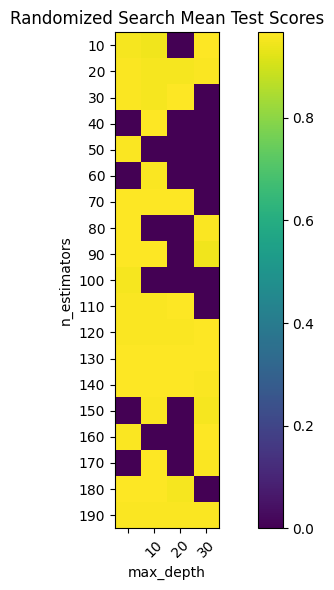

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 모델 및 하이퍼파라미터 범위 정의
model = RandomForestClassifier()
param_distributions = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 20, 30]
}

# 랜덤 서치 수행
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, cv=5)
random_search.fit(X, y)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", random_search.best_params_)

# 랜덤 서치 결과를 DataFrame으로 변환
results = random_search.cv_results_

# 점수 확인
print("Mean Test Scores:", results['mean_test_score'])

# n_estimators와 max_depth에 따른 평균 점수 시각화
mean_scores = results['mean_test_score']
n_estimators_set = param_distributions['n_estimators']
max_depth_set = param_distributions['max_depth']

# 점수 매핑을 위한 행렬 초기화
scores_matrix = np.zeros((len(n_estimators_set), len(max_depth_set)))

# 각 조합에 대해 점수 할당
for i in range(len(mean_scores)):
    n_estimators_idx = np.searchsorted(n_estimators_set, results['param_n_estimators'][i])
    max_depth_idx = max_depth_set.index(results['param_max_depth'][i])
    scores_matrix[n_estimators_idx, max_depth_idx] = mean_scores[i]

# 시각화
plt.figure(figsize=(8, 6))
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.cm.viridis)  # 색상 맵 변경
plt.colorbar()

# 축 레이블 설정
plt.xticks(np.arange(len(max_depth_set)), max_depth_set, rotation=45)
plt.yticks(np.arange(len(n_estimators_set)), n_estimators_set)

plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.title('Randomized Search Mean Test Scores')
plt.tight_layout()
plt.show()


# 베이지안 최적화 (Bayesian Optimization)

In [6]:
%pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Best parameters: OrderedDict([('max_depth', 17), ('n_estimators', 136)])


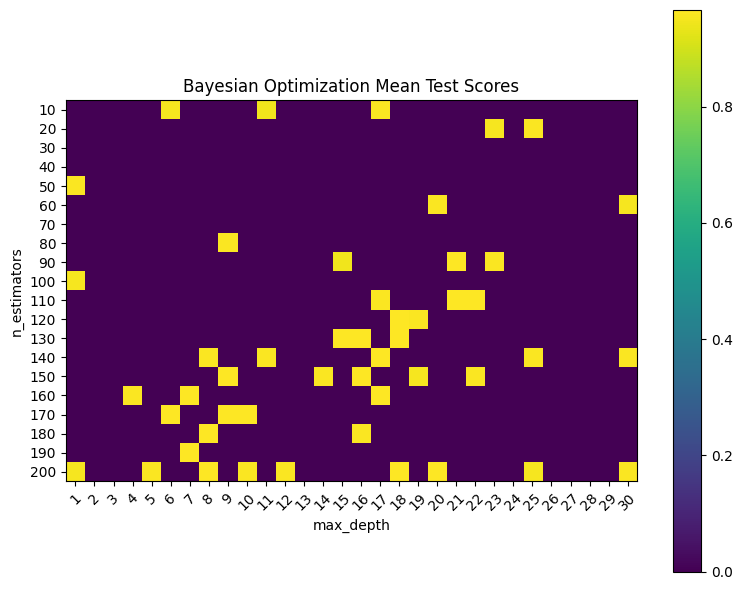

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 모델 및 하이퍼파라미터 범위 정의
model = RandomForestClassifier()
param_space = {
    'n_estimators': (10, 200),
    'max_depth': (1, 30)
}

# 베이지안 최적화 수행
opt = BayesSearchCV(model, param_space, n_iter=50, cv=5)
opt.fit(X, y)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", opt.best_params_)

# 시각화
# 최적화 과정에서의 점수 기록
scores = opt.cv_results_['mean_test_score']

# n_estimators와 max_depth에 따른 평균 점수 시각화
n_estimators_range = np.arange(param_space['n_estimators'][0], param_space['n_estimators'][1]+1, 10)
max_depth_range = np.arange(param_space['max_depth'][0], param_space['max_depth'][1]+1)

# 점수 행렬 초기화
scores_matrix = np.zeros((len(n_estimators_range), len(max_depth_range)))

# 점수 매핑
for i in range(len(scores)):
    n_estimators_idx = np.searchsorted(n_estimators_range, opt.cv_results_['params'][i]['n_estimators'])
    max_depth_idx = np.searchsorted(max_depth_range, opt.cv_results_['params'][i]['max_depth'])
    scores_matrix[n_estimators_idx, max_depth_idx] = scores[i]

# 시각화
plt.figure(figsize=(8, 6))
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.cm.viridis)  # 색상 맵 변경
plt.colorbar()

# 축 레이블 설정
plt.xticks(np.arange(len(max_depth_range)), max_depth_range, rotation=45)
plt.yticks(np.arange(len(n_estimators_range)), n_estimators_range)

plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.title('Bayesian Optimization Mean Test Scores')
plt.tight_layout()
plt.show()


# 유전 알고리즘 (Genetic Algorithm)

In [7]:
%pip install deap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for deap: filename=deap-1.4.1-cp38-cp38-macosx_10_9_x86_64.whl size=104037 sha256=87ed21e2bbaa3904a0f982e6b8ccbe612eb0a363e067e0722e785d90ea384271
  Stored in directory: /Users/sin-yeho/Library/Caches/pip/wheels/3f/57/ac/9308da1ed3c6b95526a67f35c39658a7fcf7c60034b850573d
Successfully built deap
Note: you may need to restart the kernel to use updated packages.


Best individual is: [89, 5]


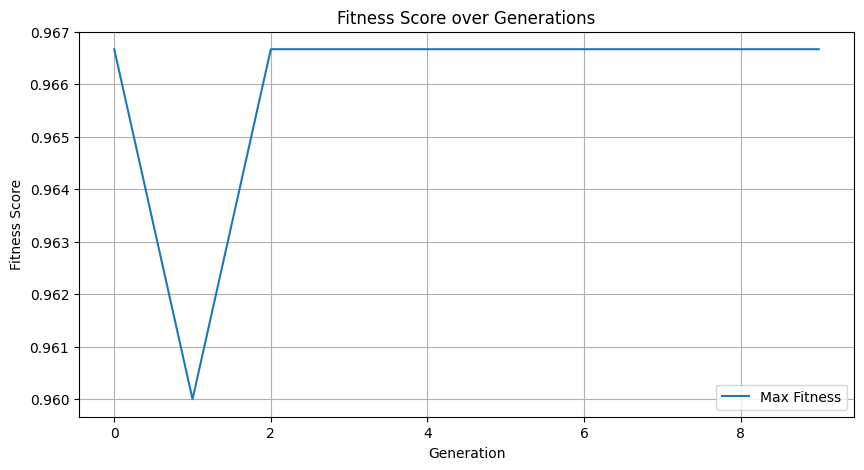

In [21]:
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 기존 클래스 삭제
try:
    del creator.FitnessMax
    del creator.Individual
except AttributeError:
    pass

# DEAP 설정
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# 데이터 로드
X, y = load_iris(return_X_y=True)

toolbox = base.Toolbox()
toolbox.register("n_estimators", random.randint, 1, 100)  # n_estimators 범위 설정
toolbox.register("max_depth", random.randint, 1, 30)  # max_depth 범위 설정
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.n_estimators, toolbox.max_depth), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 평가 함수
def evaluate(individual):
    n_estimators = int(individual[0])  # 정수로 변환
    max_depth = int(individual[1])      # 정수로 변환
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(model, X, y, cv=5).mean(),

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# 유전 알고리즘 실행
population = toolbox.population(n=10)
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

# 성능 기록을 위한 리스트
max_fitness_values = []

# 세대 반복
for gen in range(10):
    # 선택
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # 교배
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # 돌연변이
    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # 평가
    fitnesses = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit

    # 다음 세대로 교체
    population[:] = offspring

    # 최대 적합도 기록
    max_fitness = max(ind.fitness.values[0] for ind in population)
    max_fitness_values.append(max_fitness)

# 최적의 하이퍼파라미터 출력
best_individual = tools.selBest(population, 1)[0]
print("Best individual is:", best_individual)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(max_fitness_values, label='Max Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.title('Fitness Score over Generations')
plt.legend()
plt.grid()
plt.show()
